In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from matplotlib import ticker
from matplotlib.ticker import AutoMinorLocator
sns.set_style('white')

# Graficas Refineria Shushufindi


In [2]:
#Autocompletador
%config Completer.use_jedi=False

In [3]:
engine=create_engine('sqlite:///CO2_EOR.db')

df=pd.read_sql_query("SELECT* FROM R_Shushufindi", engine)
df.head()
df.columns

Index(['Refineria', 'año', 'RefinacionBarriles', 'Emisiones_CO2'], dtype='object')

In [4]:
df

,Refineria,año,RefinacionBarriles,Emisiones_CO2
0,Shushufindi,2010,6357000,188587.5735
1,Shushufindi,2011,6555000,194461.4667
2,Shushufindi,2012,7165000,212557.8046
3,Shushufindi,2013,7097000,210540.5079
4,Shushufindi,2014,7241000,214812.4303
5,Shushufindi,2015,7077000,209947.1854
6,Shushufindi,2016,7400987,219558.6251
7,Shushufindi,2017,7553998,224097.8689
8,Shushufindi,2018,7460024,221310.0242
9,Shushufindi,2019,7033492,208656.4715


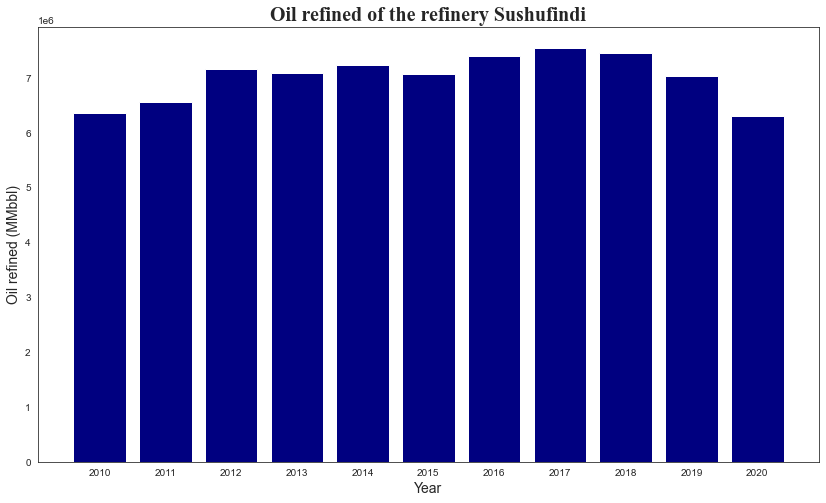

In [5]:
fig1, ax = plt.subplots(figsize=(14,8))

ax.bar(df['año'], df['RefinacionBarriles'], color='navy')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil refined (MMbbl)', fontsize=14)
#ax.set_xticks(ax.get_xticks())
ax.set_title('Oil refined of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.show()
#df.iloc[6:].set_index("año")["RefinacionBarriles"].plot(kind="bar",ylabel="Barriles Refinados",title="Producción anual de la refineria de Shushufindi")


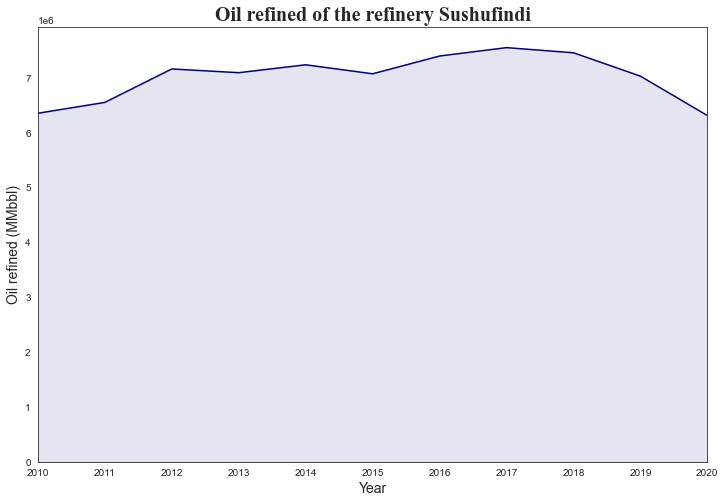

In [6]:
fig2 = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df, x='año', y='RefinacionBarriles', color='navy')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil refined (MMbbl)', fontsize=14)
ax.fill_between(df.año, df.RefinacionBarriles, alpha=0.1, color='navy')
ax.set_xlim(df.año.min(), df.año.max())
ax.set_ylim(0)
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.set_title('Oil refined of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

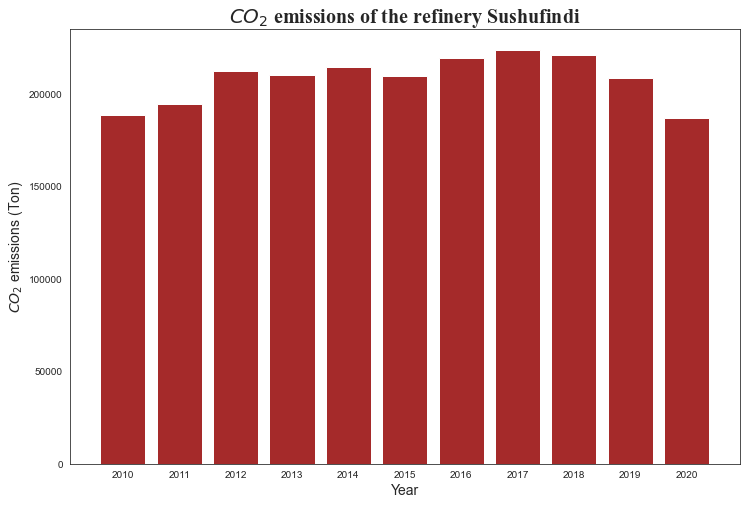

In [10]:
fig3, ax = plt.subplots(figsize=(12,8))

ax.bar(df['año'], df['Emisiones_CO2'], color='brown')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax.set_title(r'$CO_{2}$ emissions of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()
#df.iloc[6:].set_index("año")['Emisiones_CO2'].plot(kind="bar",ylabel="Emisiones de CO2 |Ton|",title="Emisiones de CO2 de la refineria de Shushufindi",color=["orange"])

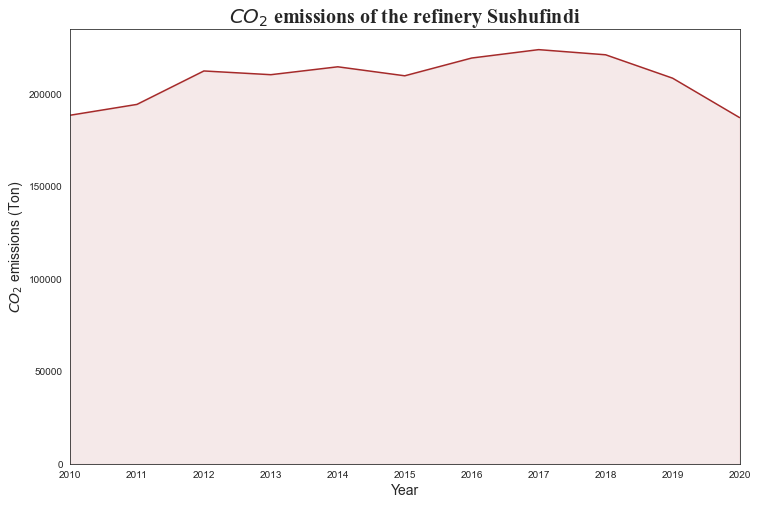

In [11]:
fig4 = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df, x='año', y='Emisiones_CO2', color='brown')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax.fill_between(df.año, df.Emisiones_CO2, alpha=0.1, color='brown')
ax.set_xlim(df.año.min(), df.año.max())
ax.set_ylim(0)
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.set_title(r'$CO_{2}$ emissions of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

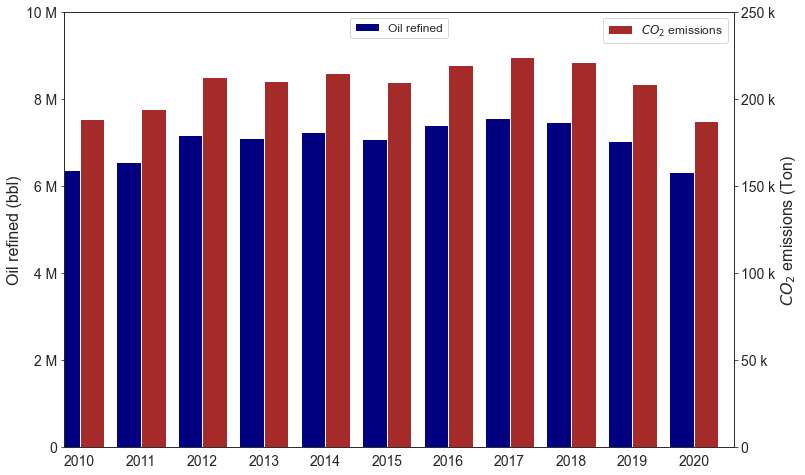

In [12]:
formatter = ticker.EngFormatter()
fig5 = plt.figure(figsize=(12,8), edgecolor='black')
ax1 = fig5.add_subplot()
ax2 = ax1.twinx()

ener = df.plot.bar(x='año', y='RefinacionBarriles', width=0.4, color='navy',
                                         ax=ax1, align='center', label='Oil refined', position=1)
emi = df.plot.bar(x='año', y='Emisiones_CO2', width=0.4, color='brown',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)

#ax1.bar(df['año'], df['RefinacionBarriles'], color='blue', label='Oil refined')
#ax2 = ax1.twinx()
#ax2.bar(df['año'], df['Emisiones_CO2'], color='orange', label='CO2 emissions')
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('Oil refined (bbl)', fontsize=16)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylim(0, 250E3)
ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
ax2.grid(visible=False)
ax1.tick_params(axis='x', labelrotation = 0)
ax1.set_ylim(0, 10E6)
plt.show()

# Graficas Termoelectricas

In [13]:
ter=pd.read_sql_query("SELECT* FROM Datos_termoelectricas", engine)
ter.head()

,Termoelectrica,año,EnergiaBruta(MWH),EmisionCO2[Ton]
0,Amazonas,2016,9568.65,8809.53
1,Amazonas,2017,9936.76,8749.89
2,Amazonas,2018,9962.33,8806.04
3,Amazonas,2019,10594.39,9661.34
4,Amazonas,2020,10571.86,9623.63


In [14]:
ter_ama = ter[ter['Termoelectrica']=='Amazonas']
ter_ama

,Termoelectrica,año,EnergiaBruta(MWH),EmisionCO2[Ton]
0,Amazonas,2016,9568.65,8809.53
1,Amazonas,2017,9936.76,8749.89
2,Amazonas,2018,9962.33,8806.04
3,Amazonas,2019,10594.39,9661.34
4,Amazonas,2020,10571.86,9623.63


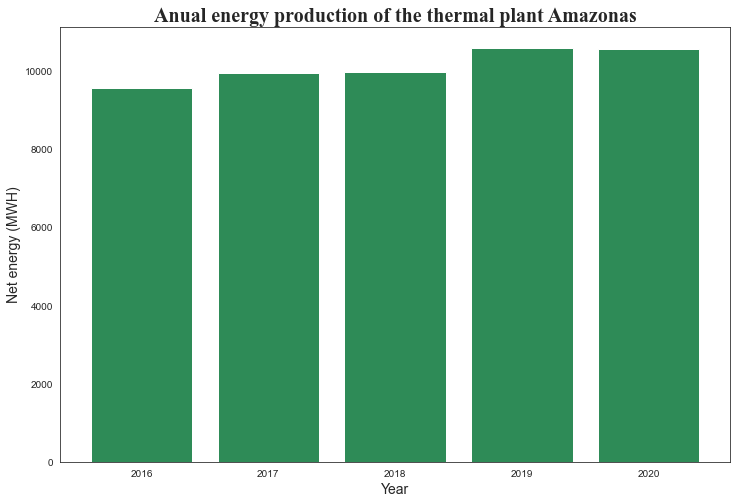

In [15]:
fig6, ax = plt.subplots(figsize=(12,8))

ax.bar(ter_ama['año'], ter_ama['EnergiaBruta(MWH)'], color='seagreen')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Net energy (MWH)', fontsize=14)
ax.set_title('Anual energy production of the thermal plant Amazonas',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

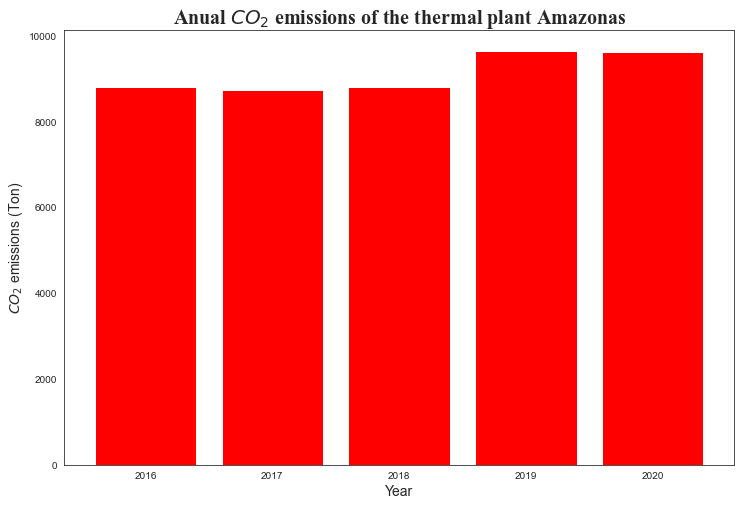

In [16]:
fig7, ax = plt.subplots(figsize=(12,8))

ax.bar(ter_ama['año'], ter_ama['EmisionCO2[Ton]'], color='red')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax.set_title(r'Anual $CO_{2}$ emissions of the thermal plant Amazonas',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

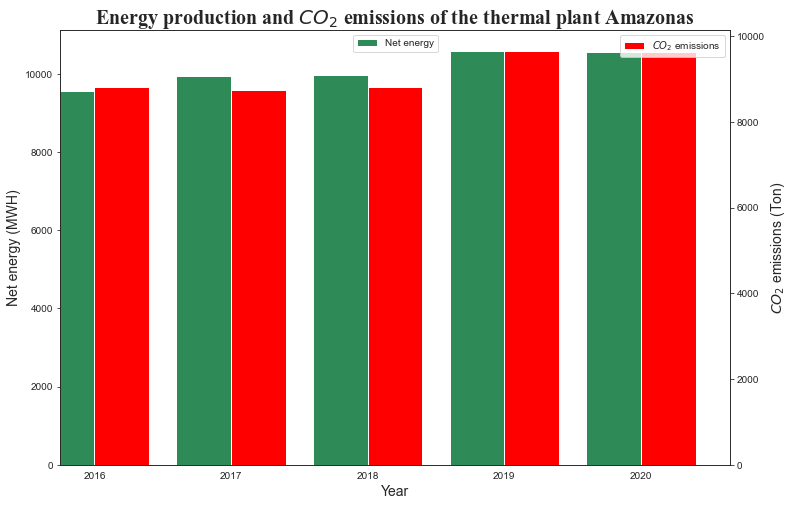

In [18]:
fig10 = plt.figure(figsize=(12,8), edgecolor='black')
ax1 = fig10.add_subplot()
ax2 = ax1.twinx()

ener = ter_ama.set_index('año')['EnergiaBruta(MWH)'].plot(kind='bar', width=0.4, color='seagreen',
                                         ax=ax1, align='center', label='Net energy', position=1)
emi = ter_ama.set_index('año')['EmisionCO2[Ton]'].plot(kind='bar', width=0.4, color='red',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net energy (MWH)', fontsize=14)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plant Amazonas',
          fontname="Times New Roman", size=20, fontweight="bold")
ax1.tick_params(axis='x', labelrotation = 0)
ax2.grid(visible=False)
plt.show()